In [3]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching packages ────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.9     

── Conflicts ───────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()



In [4]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [5]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))



In [6]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [7]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps






phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [116]:
#ps_df=as.data.frame(sample_data(ps))
#write.csv(sample_data(ps), file="/Users/stephanie.rosales/Documents/omics_projects/Resitada/subset_resistada.csv",
            #)

In [11]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!="g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_clip_nr =subset_taxa(ps_Clipped, Genus!="g__MD3-55" )
ps_clip_nr

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_Am_Pl_c =subset_samples(ps_paired, Combo=="Ambient_Placebo")
ps_Am_Pl_c

ps_Am_Pa_c =subset_samples(ps_paired, Combo=="Ambient_Pathogen")
ps_Am_Pa_c

ps_NH_Pl_c =subset_samples(ps_paired, Combo=="NH4_Placebo")
ps_NH_Pl_c

ps_NH_Pa_c =subset_samples(ps_paired, Combo=="NH4_Pathogen")
ps_NH_Pa_c

ps_placebo =subset_samples(ps_paired, Diseased=="Placebo")
ps_placebo


ps_unpaired = subset_samples(ps_Clipped, Pairs=="unpaired")
ps_unpaired

ps_placebo_un =subset_samples(ps_Clipped, Diseased=="Placebo")
ps_placebo_un

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 77 samples ]
sample_data() Sample Data:       [ 77 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 106 samples ]
sample_data() Sample Data:       [ 106 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [9]:
ps_Clipped
sample_data(ps_Clipped) %>%
  group_by(Genotype) %>%
  summarize(Paired = n())

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

Genotype,Paired
<chr>,<int>
Acerv2,22
Cooper-9,16
Elkhorn,17
FM14,21
FM19,20
FM6,18
FM9,19
K2,17
Kelsey-1,19


In [128]:
sample_data(ps_paired) %>%
  group_by(Combo, Health) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Health,Paired
<chr>,<chr>,<int>
Ambient_Pathogen,AH,3
Ambient_Pathogen,DL,23
Ambient_Placebo,AH,36
NH4_Pathogen,AH,2
NH4_Pathogen,DL,30
NH4_Placebo,AH,36
NH4_Placebo,DL,5


In [12]:
ps_fill_razor = filter_taxa(ps_razor, function(x) sum(x > 10) > (0.015*length(x)), TRUE)
ps_fill_razor 
                            
ps_fill_razor_nr = filter_taxa(ps_razor_nr, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor_nr                          

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_clip
                           
ps_fill_clip_nr = filter_taxa(ps_clip_nr, function(x) sum(x > 5) > (0.001*length(x)), TRUE)
ps_fill_clip_nr                           

ps_fill_neg = filter_taxa(ps_neg, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_neg                         
   
                                                      
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.10*length(x)), TRUE)
ps_fill_pair  
                           
                                       
                             
ps_fill_Am_Pl = filter_taxa(ps_Am_Pl_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_Am_Pl    

ps_fill_Am_Pa = filter_taxa(ps_Am_Pa_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_Am_Pa   
                             
ps_fill_NH_Pl = filter_taxa(ps_NH_Pl_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_NH_Pl    

ps_fill_NH_Pa = filter_taxa(ps_NH_Pa_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_NH_Pa  
                            
ps_Am_Pl_ALL = filter_taxa(ps_Am_Pl_ALL, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_Am_Pl_ALL                          

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 780 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 780 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 780 tips and 726 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 753 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 753 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 753 tips and 710 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1845 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 1845 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1845 tips and 1561 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5521 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 5521 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5521 tips and 4881 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 212 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 212 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 212 tips and 199 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 117 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 117 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 117 tips and 96 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1328 taxa and 36 samples ]
sample_data() Sample Data:       [ 36 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 1328 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1328 tips and 1260 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1217 taxa and 26 samples ]
sample_data() Sample Data:       [ 26 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 1217 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1217 tips and 1087 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1300 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 1300 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1300 tips and 1200 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1804 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 1804 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1804 tips and 1603 internal nodes ]

ERROR: Error in is.component.class(physeq): object 'ps_Am_Pl_ALL' not found


In [130]:
sample_data(ps_fill_pair) %>%
  group_by(Combo, Health) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Health,Paired
<chr>,<chr>,<int>
Ambient_Pathogen,AH,3
Ambient_Pathogen,DL,23
Ambient_Placebo,AH,36
NH4_Pathogen,AH,2
NH4_Pathogen,DL,30
NH4_Placebo,AH,36
NH4_Placebo,DL,5


In [158]:
sample_data(ps_fill_pair) %>%
  group_by(Combo, Outcome) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Outcome,Paired
<chr>,<chr>,<int>
Ambient_Pathogen,Unaffected,3
Ambient_Pathogen,Unhealthy,23
Ambient_Placebo,Healthy,36
NH4_Pathogen,Unaffected,2
NH4_Pathogen,Unhealthy,30
NH4_Placebo,Healthy,36
NH4_Placebo,Unhealthy,5


In [155]:
meta$Outcome

[1] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Unaffected"
  [6] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Unaffected"
 [11] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Unaffected"
 [16] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Healthy"   
 [21] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
 [26] "Unaffected" "Unaffected" "Healthy"    "Healthy"    "Unaffected"
 [31] "Unaffected" "Healthy"    "Healthy"    "Healthy"    "Healthy"   
 [36] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Unaffected"
 [41] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Unaffected"
 [46] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Unaffected"
 [51] "Unaffected" "Healthy"    "Healthy"    "Healthy"    "Unaffected"
 [56] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Unaffected"
 [61] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Unaffected"
 [66] "Unaffected" "Unaffected" "Unaffected" "Unaffected" "Unaffected"
 [71] "Unaffected" "Unaffected" "Healthy"    "Healthy"    "Healthy"   
 [76] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
 [81] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
 [86] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
 [91] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
 [96] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[101] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[106] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[111] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[116] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[121] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[126] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[131] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[136] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[141] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[146] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[151] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[156] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[161] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[166] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[171] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[176] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[181] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[186] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Healthy"   
[191] "Healthy"    "Healthy"    "Healthy"    "Healthy"    "Unaffected"
[196] NA           NA           NA           NA           "Unaffected"
[201] NA           NA           NA           NA           NA          
[206] NA           NA           "Unhealthy"  "Unhealthy"  "Unhealthy" 
[211] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[216] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[221] "Unhealthy"  "Unhealthy"  "Unaffected" "Unhealthy"  "Unhealthy" 
[226] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[231] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[236] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[241] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[246] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[251] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[256] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[261] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[266] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy" 
[271] "Unhealthy"  "Unhealthy"  "Unhealthy"  "Unhealthy"  "Healthy"   
[276] "Unhealthy"  "Unhealthy"  "Healthy"    "Unhealthy"  "Unhealthy" 
[281] NA           NA     

In [156]:
meta$Health

[1] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [16] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [31] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [46] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [61] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [76] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
 [91] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[106] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[121] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[136] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[151] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[166] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[181] "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH" "AH"
[196] "AH" "AH" "AH" "AH" "AH" NA   NA   NA   NA   NA   NA   NA   "DL" "DL" "DL"
[211] "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "AH" "DL" "DL"
[226] "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL"
[241] "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL"
[256] "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL" "DL"
[271] "DL" "DL" "DL" "DL" "AH" "DL" "DL" "AH" "DL" "DL" "DL" "DL" "DL" "DL"

# DL vs AH

In [13]:
out = ancombc(phyloseq = ps_fill_pair , formula = "Health", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Health", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, HealthDL, HealthDLSD)%>%
  mutate(group = ifelse(HealthDL > 0, "DL", "AH"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(HealthDL)  %>%
filter(HealthDL=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=HealthDL)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps_DLPL=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps_DLPL=subset_samples(ps_DLPL, !ID %in% dups & Genotype!="U41")
ps_DLPL



ps_ancom_APa = subset_samples(ps_DLPL,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,HealthDL
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0
2,a14b7162edeb7a30ddb2a46656539857,0
3,7dfdf546ed4b1ca29ad5fbc0fc732338,0
4,544e3f697c0460869c81cc5c7e774c6a,0
5,94580582244d0d8eedb558e2a90c33fa,0
6,ef6c1ba3806541ebf351ab0fcb95fb75,0


[1] 117   2

,taxon_id,HealthDLSD
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0
2,a14b7162edeb7a30ddb2a46656539857,0
3,7dfdf546ed4b1ca29ad5fbc0fc732338,0
4,544e3f697c0460869c81cc5c7e774c6a,0
5,94580582244d0d8eedb558e2a90c33fa,0
6,ef6c1ba3806541ebf351ab0fcb95fb75,0


,taxon_id,Sig
,<chr>,<lgl>
1,ce80d12fb367ffe011c2fb15bf9659bc,TRUE
2,58a75ecc587c36de8b4bbbac0c6efff2,TRUE
3,761f540ee829313961a42bdce8e5f36e,TRUE
4,13d2261e19adef516069e6d4fb5cbbd8,TRUE
5,ac6820155a85d9cc15f8f62406e10e42,TRUE
6,a3c29bcb6997cfe572a474e58291af1d,TRUE


Joining, by = "taxon_id"


[1] 56  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 56 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 56 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 56 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 56 taxa by 13 taxonomic ranks ]

In [18]:
get_ASVs = res_ancom%>%
as.data.frame() %>%
filter(grepl("o__Vibrionales|o__Alteromonadales", Order)) 

get_ASVs$ASVs

[1] "ASV_8740" "ASV_3091" "ASV_881"  "ASV_9604" "ASV_6352" "ASV_2458"
 [7] "ASV_2266" "ASV_7422" "ASV_7420" "ASV_8040" "ASV_5082" "ASV_754" 
[13] "ASV_5306" "ASV_8137" "ASV_3938" "ASV_1539" "ASV_9702" "ASV_1840"
[19] "ASV_3723" "ASV_919"  "ASV_7518" "ASV_2140" "ASV_2224" "ASV_1134"
[25] "ASV_3198" "ASV_1872" "ASV_6799"

Warning message:
“Ignoring unknown parameters: scale”
Warning message:
“Removed 368 rows containing missing values (position_stack).”


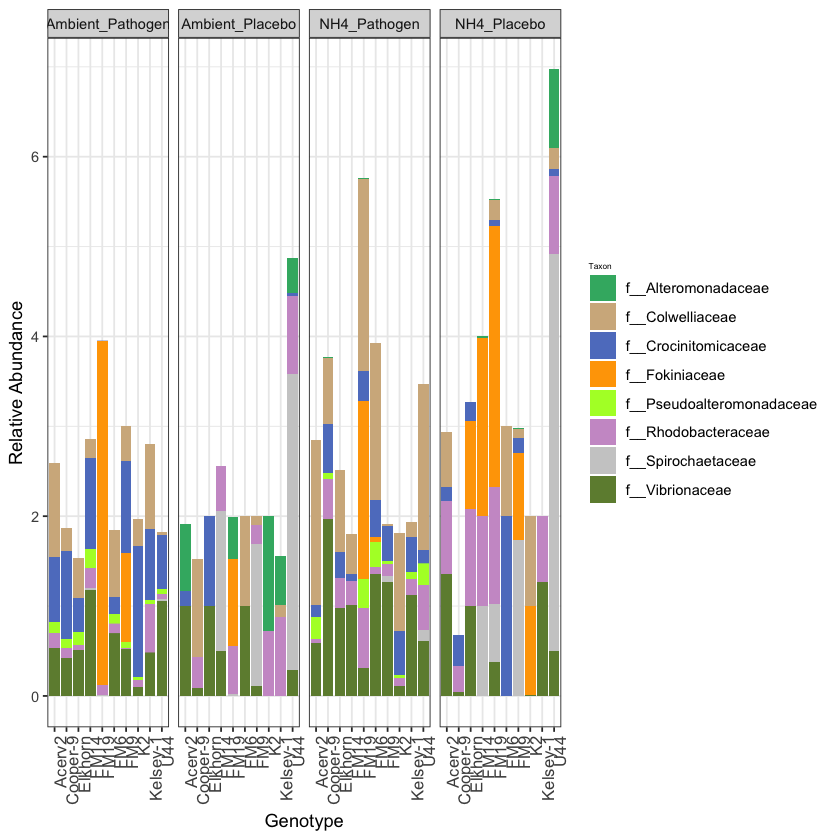

In [138]:


psr_fill_melt$Combo = factor(psr_fill_melt$Combo, levels = c("Ambient_Placebo", "NH4_Placebo", 
                                                             "Ambient_Pathogen", "NH4_Pathogen"))


psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%

as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(HealthDL) %>%
filter(HealthDL > 1 | HealthDL <= -1)  %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Family)) + 
theme_bw() +
geom_bar(stat = "identity",position="Stack", scale="free_x") +
facet_grid(.~Combo) +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“Removed 448 rows containing missing values (position_stack).”
Warning message:
“Removed 242 rows containing missing values (geom_bar).”


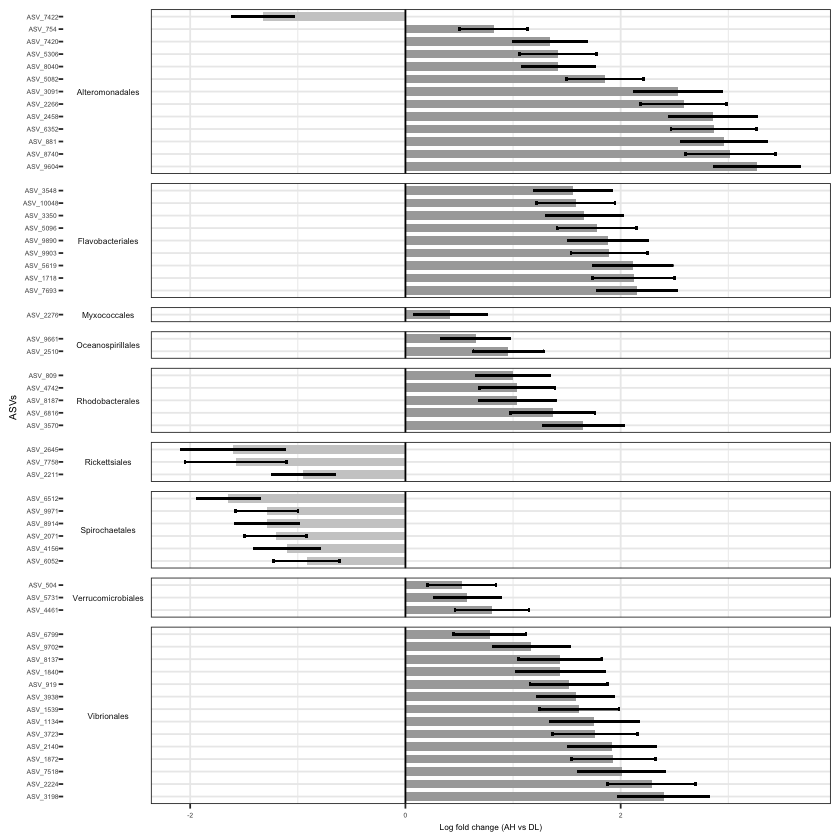

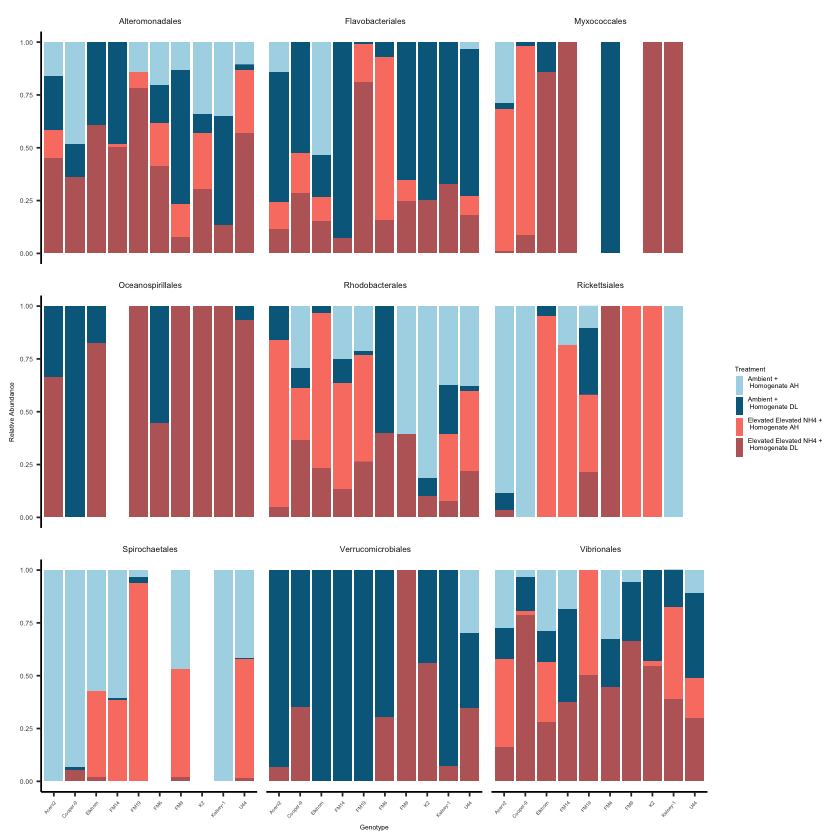

In [19]:
library(dplyr)

F1 = psr_fill_melt %>%

#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(HealthDL > 1 )  %>%
#filter(HealthDL > 1 | HealthDL <= -1)  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "") %>%
ggplot(
           aes(x = HealthDL, y = reorder(ASVs, -HealthDL),
               fill =group)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(HealthDL) - as.numeric(HealthDLSD), 
xmax = as.numeric(HealthDL) + as.numeric(HealthDLSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = "ASVs", x = "Log fold change (AH vs DL)") + 
  theme_bw() + 
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.90, ncol=1))  +
theme(axis.text.y = element_blank()) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c( 
                        "gray80", "darkgray")) +

theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 6)) +
#theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
#theme(axis.text.y=element_blank()) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, nrow=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=6)) +
facet_grid(Order~., space ="free", scales="free", switch="y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 5)) +
geom_vline(xintercept = 0,  
                color = "black", size=.5)  +
theme(legend.position = "none")



F1

psr_fill_melt$Combo = factor(psr_fill_melt$Combo, levels = c("Ambient_Placebo", "NH4_Placebo", 
                                                             "Ambient_Pathogen", "NH4_Pathogen"))


F2 = psr_fill_melt %>%
as.data.frame %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "") %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
mutate_all(funs(str_replace_all(.,"Placebo", "Homogenate AH"))) %>% 
mutate_all(funs(str_replace_all(.,"Pathogen", "Homogenate DL"))) %>% 
mutate_all(funs(str_replace_all(.,"NH4_Homogenate DL", "Elevated NH4 +\n Homogenate DL\n ")))  %>% 
mutate_all(funs(str_replace_all(.,"NH4_Homogenate AH", "Elevated NH4 +\n Homogenate AH\n")))  %>% 
mutate_all(funs(str_replace_all(.,"Ambient_Homogenate DL", "Ambient +\n Homogenate DL\n"))) %>% 
mutate_all(funs(str_replace_all(.,"Ambient_Homogenate AH", "Ambient +\n Homogenate AH\n"))) %>% 
mutate_all(funs(str_replace_all(.,"NH4", "Elevated NH4"))) %>% 
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(HealthDL) %>%
#filter(HealthDL > 1 | HealthDL <= -1)  %>%
#filter(HealthDL > 0 )  %>%
filter(Severity != "NA")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "NH4_Homogenate",
                replacement = "Elevated NH4 +\n Homogenate") %>%


ggplot(
       aes(x=Genotype, y= Abundance, fill=Combo)) +
#geom_boxplot() +
#geom_point((aes(color = Order, size=Abundance))) +
#geom_smooth(method='lm') +
geom_bar(stat = "identity",position="fill") +
theme_classic() +
scale_fill_manual(values=c( 
                         
                        
                          "lightblue", "#00688B", "salmon", "#bc6767",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1")) +


theme(strip.background = element_rect(fill="white")) +
guides(fill = guide_legend(keywidth = 0.4, keyheight =.70, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
#facet_grid(Order~., space ="free", scales="free", switch = "y") +
facet_wrap(Order~.) +
theme(strip.background = element_blank()) +
 labs(fill = "Treatment") +
theme(axis.title.x = element_text(size = 4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
#theme(legend.position="top") +
theme(axis.title.y = element_text(size=4)) +
theme(axis.text.y = element_text(size=4)) +

theme(axis.text.x = element_text(angle = 50, hjust = 1, size=3)) +
theme(strip.text.x = element_text(size = 5)) +
ylab("Relative Abundance") +
xlab("Genotype") 

F2

Warning message:
“Removed 564 rows containing missing values (geom_bar).”


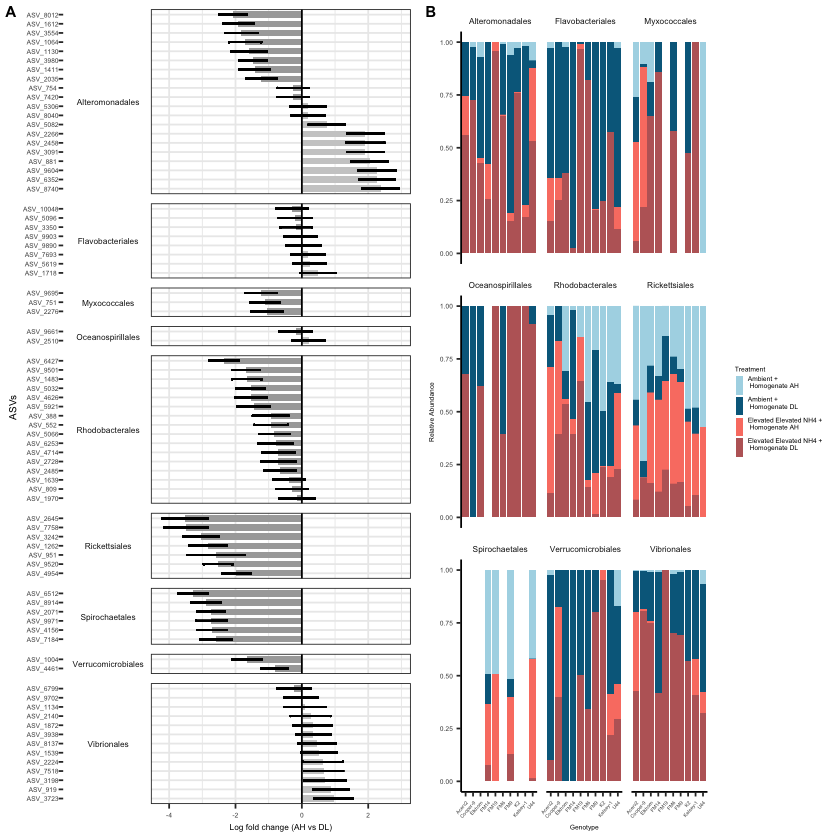

In [195]:
 ggpubr::ggarrange(F1, F2,
                  common.legend = FALSE,
                labels = c("A", "B"), font.label = list(size = 9))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/ANCOM_lesion.jpg", 
      width = 7, height = 6, units = "in", dpi=300)

In [181]:
am_ah_DL=c("NH4_Pathogen_DL", "NH4_Placebo_AH")
ps_fill_pair_DLAH= subset_samples(ps_fill_pair, Combo_health %in% am_ah_DL )
ps_fill_pair_DLAH

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 117 taxa and 66 samples ]
sample_data() Sample Data:       [ 66 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 117 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 117 tips and 96 internal nodes ]

In [182]:
out = ancombc(phyloseq = ps_fill_pair_DLAH , formula = "Health", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Health", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, HealthDL, HealthDLSD)%>%
  mutate(group = ifelse(HealthDL > 0, "AH", "DL"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(HealthDL)  %>%
filter(HealthDL=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=HealthDL)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps_DLNH=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps_DLNH=subset_samples(ps_DLNH, !ID %in% dups & Genotype!="U41")
ps_DLNH



ps_ancom_APa = subset_samples(ps_DLNH,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    




Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,HealthDL
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,-1.661220
2,a14b7162edeb7a30ddb2a46656539857,-2.337931
3,7dfdf546ed4b1ca29ad5fbc0fc732338,-1.540106
4,544e3f697c0460869c81cc5c7e774c6a,0.000000
5,94580582244d0d8eedb558e2a90c33fa,-1.457049
6,ef6c1ba3806541ebf351ab0fcb95fb75,-1.686026


[1] 109   2

,taxon_id,HealthDLSD
,<chr>,<dbl>
1,2549b8aa248e7607235d17caa2578426,0.4406026
2,a14b7162edeb7a30ddb2a46656539857,0.4386244
3,7dfdf546ed4b1ca29ad5fbc0fc732338,0.4232522
4,544e3f697c0460869c81cc5c7e774c6a,0.0000000
5,94580582244d0d8eedb558e2a90c33fa,0.4818715
6,ef6c1ba3806541ebf351ab0fcb95fb75,0.4070411


,taxon_id,Sig
,<chr>,<lgl>
1,2549b8aa248e7607235d17caa2578426,TRUE
2,a14b7162edeb7a30ddb2a46656539857,TRUE
3,7dfdf546ed4b1ca29ad5fbc0fc732338,TRUE
4,94580582244d0d8eedb558e2a90c33fa,TRUE
5,ef6c1ba3806541ebf351ab0fcb95fb75,TRUE
6,28fe0a00a6f5e062fba134618cc458e1,TRUE


Joining, by = "taxon_id"


[1] 77  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 77 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 77 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 77 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 77 taxa by 13 taxonomic ranks ]

Warning message:
“Ignoring unknown parameters: scale”


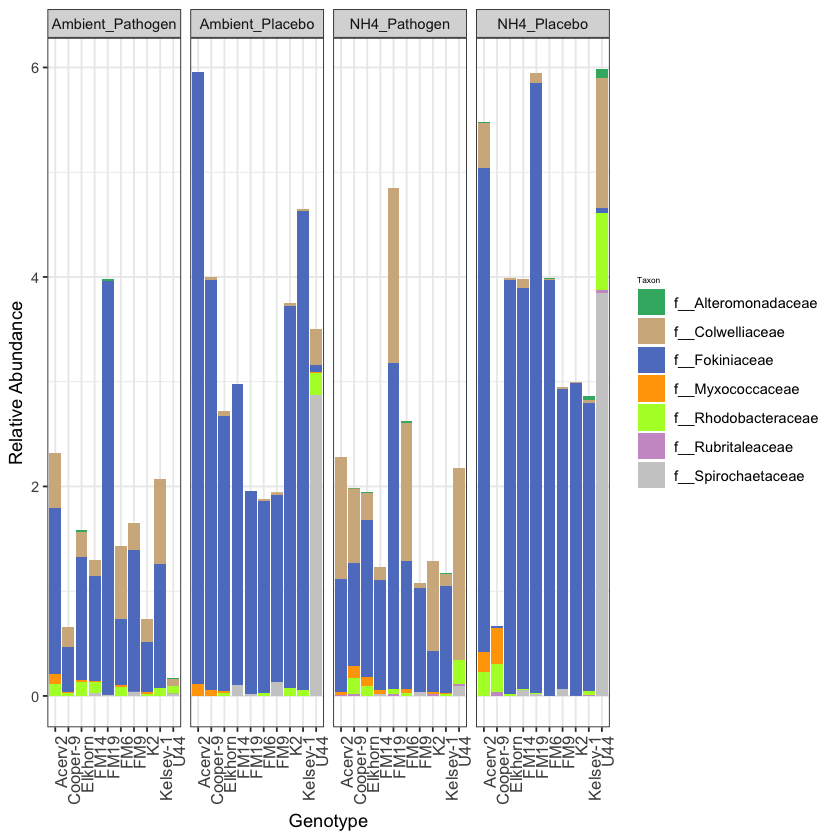

In [184]:
psr_fill_melt$Combo = factor(psr_fill_melt$Combo, levels = c("Ambient_Placebo", "NH4_Placebo", 
                                                             "Ambient_Pathogen", "NH4_Pathogen"))


psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%

as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(HealthDL) %>%
filter(HealthDL > 1 | HealthDL <= -1)  %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Family)) + 
theme_bw() +
geom_bar(stat = "identity",position="Stack", scale="free_x") +
facet_grid(.~Combo) +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 


In [166]:
am_ah_DL=c("NH4_Pathogen_DL", "Ambient_Pathogen_DL")
ps_fill_pair_DL= subset_samples(ps_fill_pair, Combo_health %in% am_ah_DL )

ps_fill_pair_DL

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 869 taxa and 53 samples ]
sample_data() Sample Data:       [ 53 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 869 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 869 tips and 729 internal nodes ]

In [179]:
out = ancombc(phyloseq = ps_fill_pair_DL, formula = "Nutrients", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Nutrients", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = TRUE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NutrientsNH4, NutrientsNH4SD)%>%
  mutate(group = ifelse(NutrientsNH4 > 0, "Ambient", "NH4"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NutrientsNH4)  %>%
filter(NutrientsNH4=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NutrientsNH4)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps_DLNH=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps_DLNH=subset_samples(ps_DLNH, !ID %in% dups & Genotype!="U41")
ps_DLNH



ps_ancom_APa = subset_samples(ps_DLNH,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    




Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,NutrientsNH4
,<chr>,<dbl>
1,3e25ffb24420d1120183e84047dd818e,-0.1812231
2,814c4938df1d40f53e14f3f2803a4e07,-1.0109447
3,ad316e868729822221e7a12b2c40bf88,0.4902168
4,717bd22b8f9c3d9075bd69ccb5f1ace0,0.2786610
5,43f63c57521b3d740a6ac67fd725ee33,0.1551844
6,03ebce4eb76077e5720b4bff58448896,0.0000000


[1] 201   2

,taxon_id,NutrientsNH4SD
,<chr>,<dbl>
1,3e25ffb24420d1120183e84047dd818e,0.3832062
2,814c4938df1d40f53e14f3f2803a4e07,0.5119470
3,ad316e868729822221e7a12b2c40bf88,0.4209804
4,717bd22b8f9c3d9075bd69ccb5f1ace0,0.4357339
5,43f63c57521b3d740a6ac67fd725ee33,0.4023628
6,03ebce4eb76077e5720b4bff58448896,0.0000000


,taxon_id,Sig
,<chr>,<lgl>
1,3e25ffb24420d1120183e84047dd818e,TRUE
2,814c4938df1d40f53e14f3f2803a4e07,TRUE
3,ad316e868729822221e7a12b2c40bf88,TRUE
4,717bd22b8f9c3d9075bd69ccb5f1ace0,TRUE
5,43f63c57521b3d740a6ac67fd725ee33,TRUE
6,2bc2842aa9b3071162b3db2324e25097,TRUE


Joining, by = "taxon_id"


[1] 98  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 98 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 98 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 98 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 98 taxa by 13 taxonomic ranks ]

In [ ]:


psr_fill_melt$Combo = factor(psr_fill_melt$Combo, levels = c("Ambient +\n Homogenate AH", "NH4 +\n Homogenate AH", 
                                                             "Ambient +\n Homogenate DL", "NH4 +\n Homogenate DL"))


psr_fill_melt %>%
#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(HealthDL > 1 )  %>%

ggplot(
           aes(x = HealthDL, y = reorder(ASVs, -HealthDL),
               fill =Genus)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(HealthDL) - as.numeric(HealthDLSD), 
xmax = as.numeric(HealthDL) + as.numeric(HealthDLSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1")) 


In [ ]:
psr_fill_melt %>%
#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
filter(HealthDL > 1 ) %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
#mutate_all(type.convert) %>%
#mutate_if(is.factor, as.character) %>%
#arrange(HealthDL) %>%
filter(Type=="Clipped"& Pairs=="paired")  %>%
ggplot(
       aes(x=Health, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="Fill", scale="free_x") +
facet_grid(.~Combo) +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 


In [ ]:
ps_DLNH
ps_DLPL

In [ ]:
merge_ps_DL = merge_phyloseq(ps_DLNH, ps_DLPL)
merge_ps_DL
psr_fill_melt = merge_ps_DL  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt() 

In [ ]:
psr_fill_melt %>%
#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%

filter(HealthDL > 1 ) %>%
filter(Type=="Clipped"& Pairs=="paired")  %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
#mutate_all(type.convert) %>%
#mutate_if(is.factor, as.character) %>%
#arrange(HealthDL) %>%
ggplot(
       aes(x=Health, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
#geom_boxplot() +
#scale_y_continuous(trans = "log10") +
#geom_point(position = position_jitterdodge(), alpha=0.5, size=1) +
facet_grid(.~Combo, scales="free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 


In [ ]:
out = ancombc(phyloseq = ps_fill_pair, formula = "Health", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Health", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, HealthDL, HealthDLSD)%>%
  mutate(group = ifelse(HealthDL > 0, "AH", "DL"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(HealthDL)  %>%
filter(HealthDL=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=HealthDL)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps_DLNH, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_APa = subset_samples(ps2,
                      Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    




In [ ]:
psr_fill_melt$Combo = factor(psr_fill_melt$Combo, levels = c("Ambient +\n Homogenate AH", "NH4 +\n Homogenate AH", 
                                                             "Ambient +\n Homogenate DL", "NH4 +\n Homogenate DL"))

psr_fill_melt %>%
#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%

filter(HealthDL > 1 | HealthDL <= -1)  %>%
ggplot(
           aes(x = HealthDL, y = reorder(ASVs, -HealthDL),
               fill =Genus)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(HealthDL) - as.numeric(HealthDLSD), 
xmax = as.numeric(HealthDL) + as.numeric(HealthDLSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1")) 



psr_fill_melt %>%
#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(HealthDL > 1 )  %>%

ggplot(
           aes(x = HealthDL, y = reorder(ASVs, -HealthDL),
               fill =Genus)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(HealthDL) - as.numeric(HealthDLSD), 
xmax = as.numeric(HealthDL) + as.numeric(HealthDLSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1")) 




psr_fill_melt %>%
#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%

filter(HealthDL > 1 ) %>%
filter(Type=="Clipped"& Pairs=="paired")  %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
#mutate_all(type.convert) %>%
#mutate_if(is.factor, as.character) %>%
#arrange(HealthDL) %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
#geom_boxplot() +
#scale_y_continuous(trans = "log10") +
#geom_point(position = position_jitterdodge(), alpha=0.5, size=1) +
facet_grid(.~Combo, scales="free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 




In [ ]:
psr_fill_melt %>%
#as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%

filter(HealthDL > 1 ) %>%
filter(Type=="Clipped"& Pairs=="paired")  %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
#mutate_all(type.convert) %>%
#mutate_if(is.factor, as.character) %>%
#arrange(HealthDL) %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Combo_health)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
#geom_boxplot() +
#scale_y_continuous(trans = "log10") +
#geom_point(position = position_jitterdodge(), alpha=0.5, size=1) +
facet_wrap(Genus~., scales="free_x") +
scale_fill_manual(values=c("lightgreen","#3CB371","lightblue", "lightsalmon", "salmon","lightpink", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 


